In [130]:
# Import des packages
import pandas as pd
import numpy as np
import os
import glob
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [131]:
# 1. Définir le chemin vers le dossier contenant les fichiers CSV
path = '/Users/Mamad/Documents/Data_Analyst/Mes projets/data-sales-main'
# 2. Utiliser glob pour trouver tous les fichiers .csv dans le dossier
all_files =glob.glob(os.path.join(path,"*.csv"))

# 3. Lire chaque fichier et les stocker dans une liste de DataFrames
list_of_dfs = []
for filename in all_files:
    df =pd.read_csv(filename)
    list_of_dfs.append(df)

# 4. Concaténer (fusionner) tous les DataFrames de la liste en un seul
combined_df = pd.concat(list_of_dfs, ignore_index=True)

# 5. Sauvegarder le DataFrame combiné dans un nouveau fichier CSV
# L'option index=False évite d'écrire une colonne d'index inutile dans le fichier
combined_df.to_csv("sales_final_2019.csv", index=False, encoding='utf-8-sig')

# Exploration des données de la vente 2019

In [132]:
df = pd.read_csv('sales_final_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [133]:
# le nombre de ligne et de colonne
df.shape

(186850, 6)

In [134]:
# les types de variable
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [135]:
# les valeurs manquantes
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [136]:
# Suppression des valeurs manquantes
df = df.dropna(how='all')

In [137]:
# Vérification des valeurs manquantes
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

# Quel est le mois durant lequel nous avons réalisé le meilleur chiffre d'affaire ?

In [138]:
def month(x):
    return x.split('/')[0]

In [139]:
df['Month']= df['Order Date'].apply(month)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [140]:
df['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [141]:
# Drop rows where Month is 'Order Date'
df = df[df['Month']!='Order Date']
df['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [142]:
# Drop rows where 'Month' is NaN before converting to int
df = df[df['Month'].notna()]
df['Month'] = df['Month'].astype(int)
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [143]:
# Conversion de la quantité et du prix en entier
# Pour la quantité
df = df[df['Quantity Ordered'].notna()]
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
# Pour le prix 
df = df[df['Price Each'].notna()]
df['Price Each'] = df['Price Each'].astype(float)
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [144]:
df['Chiffre_d\'affaire']= df['Quantity Ordered']*df['Price Each']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Chiffre_d'affaire
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [145]:
df.groupby('Month')['Chiffre_d\'affaire'].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Chiffre_d'affaire, dtype: float64

<Axes: >

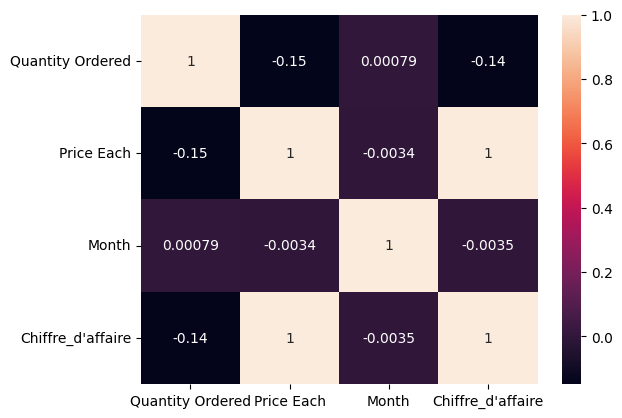

In [146]:
sns.heatmap(df.corr(numeric_only=True), annot= True)

In [147]:
# Calculer le chiffre d'affaire par mois puis tracer
monthly_sales = df.groupby('Month')["Chiffre_d'affaire"].sum().reset_index().sort_values('Month')
fig1 = px.bar(monthly_sales, x='Month', y="Chiffre_d'affaire",
       title="Le chiffre d'affaire en fonction des mois",
       color='Month')
fig1.show()

In [148]:
# Créer une figure avec deux sous-graphiques
fig = make_subplots(rows=2, cols=1, subplot_titles=("Graphique en barres", "Graphique en ligne"))

# Ajouter le graphique en barres
fig.add_trace(
    go.Bar(x=monthly_sales['Month'], y=monthly_sales["Chiffre_d'affaire"], name="Barres"),
    row=1, col=1
)

# Ajouter le graphique en ligne
fig.add_trace(
    go.Scatter(x=monthly_sales['Month'], y=monthly_sales["Chiffre_d'affaire"], 
              mode='lines+markers', name="Ligne"),
    row=2, col=1
)

# Mise à jour du layout
fig.update_layout(height=800, title_text="Chiffre d'affaire mensuel - Comparaison des visualisations")
fig.show()

## Interprétation
#### Analyse des tendances
Points clés :
- Le pic de ventes se situe en décembre (mois 12) avec le chiffre d'affaires le plus élevé
- Le point le plus bas est en janvier (mois 1)
On observe une tendance générale à la hausse au fil de l'année
#### Tendances saisonnières :
- Premier trimestre (1-3) : Démarrage faible avec une légère hausse
- Deuxième trimestre (4-6) : Stabilisation des ventes
- Troisième trimestre (7-9) : Légère diminution progressive
- Quatrième trimestre (10-12) : Forte croissance culminant en décembre
#### Insights :
La période des fêtes de fin d'année (décembre) génère clairement les meilleures performances
Il y a une saisonnalité marquée avec des ventes plus faibles en début d'année
Les ventes semblent suivre un cycle avec une progression graduelle jusqu'au pic de décembre

# Dans quelle ville nous avons enregistré un maximum de commandes ?

In [149]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Chiffre_d'affaire
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [150]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [151]:
def ville(x):
    return x.split(',')[1]


In [152]:
df['ville'] = df['Purchase Address'].apply(ville)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Chiffre_d'affaire,ville
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [153]:
ville_count = df.groupby('ville')['ville'].count()
ville_count

ville
Atlanta          14881
Austin            9905
Boston           19934
Dallas           14820
Los Angeles      29605
New York City    24876
Portland         12465
San Francisco    44732
Seattle          14732
Name: ville, dtype: int64

In [154]:
# Create a DataFrame from the ville_count series
ville_df = pd.DataFrame({
    'Ville': ville_count.index,
    'Nombre_commandes': ville_count.values
})

# Create the bar plot
fig = px.bar(ville_df, 
             x='Ville', 
             y='Nombre_commandes',
             title='Nombre de commandes par ville',
             color='Ville')

fig.show()

#### Interprétation du graphique "Nombre de commandes par ville"
##### Points clés :
- Les données montrent une répartition inégale des commandes entre les différentes villes
- La ville de San Francisco se démarque nettement avec le plus grand nombre de commandes
- Los Angeles et New York suivent en deuxième et troisième position
- Les autres villes présentent des volumes de commandes plus modérés
##### Observations :
- Il existe une forte concentration des commandes dans les grandes métropoles côtières
- Les villes du centre du pays (comme Portland et Austin) enregistrent moins de commandes
- Cette distribution pourrait s'expliquer par :
   * La densité de population dans ces zones
   * Le pouvoir d'achat des habitants
   * L'efficacité des stratégies marketing locales

# En quel moment doit on faire une campagne publicitaire pour avoir plus de ventes ?

In [155]:
df['heure']= pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M').dt.hour

In [156]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Chiffre_d'affaire,ville,heure
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [157]:
# Initialisation de deux listes vides pour stocker les heures et le nombre de commandes par heure
keys_list = []
heures_list = []

# Groupement du DataFrame par la colonne 'heure' et itération sur chaque groupe
# Pour chaque heure unique, 'key' contiendra l'heure et 'group' sera un sous-DataFrame 
# contenant toutes les commandes passées à cette heure.
for key, group in df.groupby('heure'):
    # Ajout de l'heure (la clé du groupe) à la liste des clés
    keys_list.append(key)
    # Ajout du nombre de commandes (la taille du groupe) à la liste des heures
    heures_list.append(len(group))

# Affichage de la liste contenant le nombre de commandes pour chaque heure
heures_list

[3910,
 2350,
 1243,
 831,
 854,
 1321,
 2482,
 4011,
 6256,
 8748,
 10944,
 12411,
 12587,
 12129,
 10984,
 10175,
 10384,
 10899,
 12280,
 12905,
 12228,
 10921,
 8822,
 6275]

In [158]:
# Créer un DataFrame pour une meilleure manipulation avec Plotly
hourly_sales_df = pd.DataFrame({
    'Heure': keys_list,
    'Nombre_commandes': heures_list
}).sort_values('Heure')

# Créer le graphique en ligne avec des améliorations
fig = px.line(hourly_sales_df, 
              x='Heure', 
              y='Nombre_commandes',
              title='Évolution du nombre de commandes au cours de la journée',
              labels={
                  'Heure': 'Heure de la journée',
                  'Nombre_commandes': 'Nombre de commandes'
              },
              markers=True) # Ajoute des points sur la ligne pour chaque heure

# Personnaliser davantage l'apparence du graphique
fig.update_layout(
    xaxis_title='Heure de la journée (0-23h)',
    yaxis_title='Volume des commandes',
    template='plotly_white', # Utiliser un thème épuré
    xaxis=dict(tickmode='linear') # S'assurer que toutes les heures sont affichées
)

fig.show()

#### Interprétation de l'évolution du nombre de commandes au cours de la journée

##### Points Clés :
- Le graphique montre deux pics d'activité commerciale au cours de la journée.
- Le premier pic, plus modéré, se situe autour de midi (11h-13h).
- Le second pic, beaucoup plus important, a lieu en soirée, aux alentours de 19h (18h-20h).
- L'activité est la plus faible durant la nuit et tôt le matin (entre 0h et 8h).
##### Analyse des Pics d'Activité :
1) Le pic de midi (11h-13h) : Ce créneau correspond probablement à la pause déjeuner, un moment où les gens ont du temps libre pour naviguer et faire des achats en ligne.
2) Le pic du soir (18h-20h) : C'est le moment le plus actif de la journée. Il coïncide avec la fin de la journée de travail, lorsque les clients sont rentrés chez eux et disposent de plus de temps pour leurs achats personnels.
##### Recommandations Stratégiques :
- Pour maximiser l'impact d'une campagne publicitaire, il est conseillé de la diffuser juste avant et pendant ces pics d'activité.

- Campagne du midi : Lancer des publicités entre 10h30 et 13h pour capter l'attention des acheteurs pendant leur pause déjeuner.
- Campagne du soir (prioritaire) : Concentrer le budget publicitaire principal entre 18h et 20h. C'est la fenêtre où le potentiel de conversion est le plus élevé, car le plus grand nombre de clients est actif.
  
En conclusion, les moments les plus opportuns pour une campagne publicitaire sont juste avant midi et, surtout, en début de soirée vers 19h.

# Quel produit se vend le plus ?

In [159]:
produit_vendu= df.groupby('Product')['Quantity Ordered'].sum()
produit_vendu

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [160]:
px.bar(produit_vendu)

In [161]:
prix_vendu =df.groupby('Product')['Price Each'].mean()
prix_vendu

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [162]:
px.bar(prix_vendu)

In [163]:
prix_quantity = pd.DataFrame({'prix': prix_vendu, 'quantity': produit_vendu}).sort_values('prix')
prix_quantity

,prix,quantity
Product,,
AAA Batteries (4-pack),2.99,31017
AA Batteries (4-pack),3.84,27635
USB-C Charging Cable,11.95,23975
Wired Headphones,11.99,20557
Lightning Charging Cable,14.95,23217
Bose SoundSport Headphones,99.99,13457
20in Monitor,109.99,4129
27in FHD Monitor,149.99,7550
Apple Airpods Headphones,150.00,15661


In [164]:
# Créer une figure avec un axe Y secondaire
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Ajouter la trace pour la quantité (graphique en barres)
fig.add_trace(
    go.Bar(
        x=prix_quantity.index, 
        y=prix_quantity['quantity'], 
        name="Quantité Vendue",
        marker_color='rgb(55, 83, 109)' # Couleur pour les barres
    ),
    secondary_y=False,
)

# Ajouter la trace pour le prix (graphique en ligne)
fig.add_trace(
    go.Scatter(
        x=prix_quantity.index, 
        y=prix_quantity['prix'], 
        name="Prix Unitaire Moyen",
        mode='lines+markers',
        marker_color='rgb(26, 118, 255)' # Couleur pour la ligne
    ),
    secondary_y=True,
)

# Mettre à jour le layout du graphique pour les titres et les axes
fig.update_layout(
    title_text="Quantité Vendue et Prix Moyen par Produit",
    template='plotly_white',
    legend=dict(x=0.01, y=0.99) # Position de la légende
)

# Nommer les axes
fig.update_xaxes(title_text="Produit")
fig.update_yaxes(title_text="<b>Quantité Vendue</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Prix Unitaire Moyen ($)</b>", secondary_y=True)

fig.show()

### Analyse des Ventes par Produit

#### Points Clés :
- Les produits les plus vendus en termes de quantité sont les **accessoires à bas prix et à forte demande**.
- Les produits les moins vendus sont les **articles les plus chers**.

#### Produits les Plus Vendus :
1.  **Piles AAA (4-pack)** et **Piles AA (4-pack)**
2.  **Câble de chargement USB-C** et **Câble de chargement Lightning**
3.  **Écouteurs filaires (Wired Headphones)**

Ces produits se caractérisent par leur faible coût et leur grande utilité, ce qui explique les volumes de vente élevés.

#### Corrélation entre Prix et Quantité :
Le graphique illustre une **corrélation négative très nette** entre le prix d'un produit et la quantité vendue :
- **Quand le prix est bas (ligne bleue), la quantité vendue est élevée (barres grises).**
- **Inversement, quand le prix est élevé, la quantité vendue est faible.**

Par exemple, le **Macbook Pro Laptop** et le **ThinkPad Laptop** ont les prix les plus élevés et, par conséquent, les quantités vendues les plus faibles.

#### Recommandations Stratégiques :
- **Moteurs de volume** : Les accessoires comme les piles et les câbles sont excellents pour attirer les clients et générer du trafic.
- **Ventes croisées (Cross-selling)** : Proposez ces accessoires à forte vente lors de l'achat d'articles plus chers. Par exemple, offrez une réduction sur un chargeur USB-C pour l'achat d'un Macbook Pro.
- **Offres groupées (Bundling)** : Créez des offres groupées en associant un produit cher et peu vendu avec un accessoire populaire pour augmenter l'attractivité de l'offre globale.

# Quelles sont les combinaison de produits qui se vendent le plus ?

In [165]:
df =df[df['Order ID'].duplicated(keep=False)]

In [166]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df.head()

C:\Users\Mamad\AppData\Local\Temp\ipykernel_12884\368989265.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Chiffre_d'affaire,ville,heure,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [167]:
df2 = df.drop_duplicates(subset=['Order ID'])

In [168]:
# 1. Compter les combinaisons et sélectionner le top 5
top_5_combinations = df2['Grouped'].value_counts().nlargest(5)

# 2. Créer un DataFrame propre pour le graphique
plot_df = top_5_combinations.reset_index()
plot_df.columns = ['Combinaison', 'Nombre de Ventes'] # Renommer les colonnes

# 3. Créer le graphique à partir du DataFrame avec Plotly Express
fig = px.pie(plot_df, 
             values='Nombre de Ventes', 
             names='Combinaison',
             title='Top 5 des combinaisons de produits les plus vendues',
             hole=0.4, # Pour un effet "donut"
             color_discrete_sequence=px.colors.qualitative.Pastel)

# 4. Améliorer la lisibilité
fig.update_traces(textposition='inside', textinfo='percent+label', pull=[0.05, 0, 0, 0, 0]) # Met en avant la 1ère part
fig.update_layout(showlegend=False, uniformtext_minsize=10, uniformtext_mode='hide')

fig.show()

#### Interprétation 
##### Analyse des Combinaisons de Produits les Plus Vendues
##### Points Clés :
- La combinaison la plus populaire est l'achat d'un smartphone avec son accessoire de charge essentiel.
- Les produits du même écosystème (par exemple, Apple) sont très souvent achetés ensemble.
##### Combinaisons les Plus Fréquentes :
- iPhone et Câble de chargement Lightning : C'est de loin la combinaison la plus vendue. Les clients achètent souvent un câble supplémentaire ou de remplacement avec leur nouveau téléphone.
- Google Phone et Câble de chargement USB-C : On observe la même tendance pour les téléphones Google, ce qui confirme que les clients associent l'achat d'un téléphone à son chargeur.
- iPhone et Écouteurs filaires (Wired Headphones) : De nombreux clients complètent leur achat de téléphone avec des écouteurs, un accessoire de base souvent nécessaire.
##### Insights Stratégiques :
- Opportunités de Ventes Groupées (Bundling) : Les données montrent une forte tendance des clients à acheter des accessoires en même temps que le produit principal.
- Comportement Client : Les clients cherchent à obtenir une solution complète (téléphone + chargeur + écouteurs) lors de leur achat.
##### Recommandations :
- Créer des Offres Spéciales : Proposez des "packs" ou "bundles" (ex: "Pack Démarrage iPhone" avec un téléphone, un câble et des écouteurs) à un prix légèrement réduit pour encourager ces achats groupés et augmenter la valeur moyenne du panier.
- Optimiser les Ventes Croisées (Cross-selling) : Sur la page produit d'un iPhone, suggérez automatiquement l'ajout d'un câble Lightning et d'écouteurs au panier avec une mention comme "Fréquemment achetés ensemble".
